In [56]:
## import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
stop_word= stopwords.words('english')
punct = string.punctuation
import re
from nltk.stem import WordNetLemmatizer
lemmatize= WordNetLemmatizer()

In [57]:
# Load the dataset
df = pd.read_csv('Review_data.csv')

In [58]:
print(df.shape)    # checking the Dataset shape

df.head()

(39360, 2)


,review,rating
0,"[""Sony is a Sony, they just know how to make a...",5-star
1,"['3 days back I purchased Sony 43"" Google TV K...",5-star
2,['The product was delivered sealed and the cou...,5-star
3,['Thank you Sarfaraz bhai. Quick installation ...,5-star
4,"[""Sony as always maintained its credibility by...",5-star



# CLEANING THE DATASET

In [162]:
## let's make a function for cleaning the text_data
stop_word= set(stopwords.words('english'))
stop_word.update(('u','n','r', 'un','il','th','da', 'p','c','a','k','s','x','i'))
punc= string.punctuation
def process(message):   # this function can be made more able to text analysis
    text= re.sub(r'https?:\S+|www.\S+','',message) # remove hyperlink
    text= re.sub(r"\'ve", ' have', text)
    text= re.sub(r"\'m", ' am', text)
    text= re.sub(r"\'re", ' are', text)
    text= re.sub("\'s", 's', text)
    text = re.sub(r"[^a-zA-Z]+", ' ', text)
    text= re.sub("\s+",' ', text)  # remove extra whitespaces
    text = text.lower()
    return text


In [166]:
## Removing stopwords & punctuation of the review text
# lemmatization
#wd = [process(w).strip() for w in df['review'][:10]]
word = [[' '.join(lemmatize.lemmatize(w) for w in sent.split() if w not in stop_word if w not in punc)] 
        for sent in df['review']]
wd = [process(str(w)).strip() for w in word]

df['clean_text'] = wd

In [124]:
## let's check duplicate rows in dataset and dropped it  # UNK
print('original shape',df.shape)
print('Duplicates rows',df.duplicated(subset=['clean_text']).sum())  

df.drop_duplicates(subset= ['clean_text'] ,inplace=True,ignore_index=True)   # removed duplicate rows
print('dataset shape without duplicate rows',df.shape)

original shape (39360, 5)
Duplicates rows 12602
dataset shape without duplicate rows (26758, 5)


In [121]:
## UNK making new column for review length   
length = [len(w.split()) for w in df['review']]
df['review_length'] = length

# making new column for cleaned review length
length_2 = [len(w.split()) for w in df['clean_text']]
df['clean_review_length'] = length_2

In [125]:
# let's check differences between review_length and clean_review_length 
df.head()

,review,rating,clean_text,review_length,clean_review_length
0,"[""Sony is a Sony, they just know how to make a...",5-star,sony sony know make great product picture qual...,73,37
1,"['3 days back I purchased Sony 43"" Google TV K...",5-star,day back i purchased sony google tv kd x k i s...,144,93
2,['The product was delivered sealed and the cou...,5-star,the product delivered sealed courier boy opene...,61,31
3,['Thank you Sarfaraz bhai. Quick installation ...,5-star,thank sarfaraz bhai quick installation day del...,54,34
4,"[""Sony as always maintained its credibility by...",5-star,sony always maintained credibility giving best...,72,42


In [127]:
# counting the values of rating variable
df['rating'].value_counts()

1-star       6298
5-star       5603
4-star       4728
3-star       4242
2-star       3788
5            1283
4             356
four-star     176
1             173
3              82
2              29
Name: rating, dtype: int64

In [129]:
# replacing the value in rating variaable
df['rating'].replace({'1-star':1,'2-star':2,'3-star':3,'4-star':4,'5-star':5,'four-star':4,
                        '5':5,'4':4,'3':3,'2':2,'1':1},inplace=True)

In [168]:
df['rating'].value_counts()

5    6886
1    6471
4    5260
3    4324
2    3817
Name: rating, dtype: int64

In [132]:
# COUNTING THE TOTAL NUMBERS OF WORDS 
print('total word length of review =',df['review_length'].sum())
print('clean review word length =',df['clean_review_length'].sum())

total word length of review = 848632
clean review word length = 574792


In [133]:
#  Statistical description about review length
df[['review_length','clean_review_length']].describe()

# About 1 to 2 percent of review is over 100 words 

,review_length,clean_review_length
count,26758.000000,26758.000000
mean,31.715076,21.481127
std,46.146958,28.685313
min,1.000000,0.000000
25%,8.000000,6.000000
50%,18.000000,13.000000
75%,39.000000,26.000000
max,1498.000000,942.000000


# ANALYZED THE DATA THROUGH VISUALIZATION

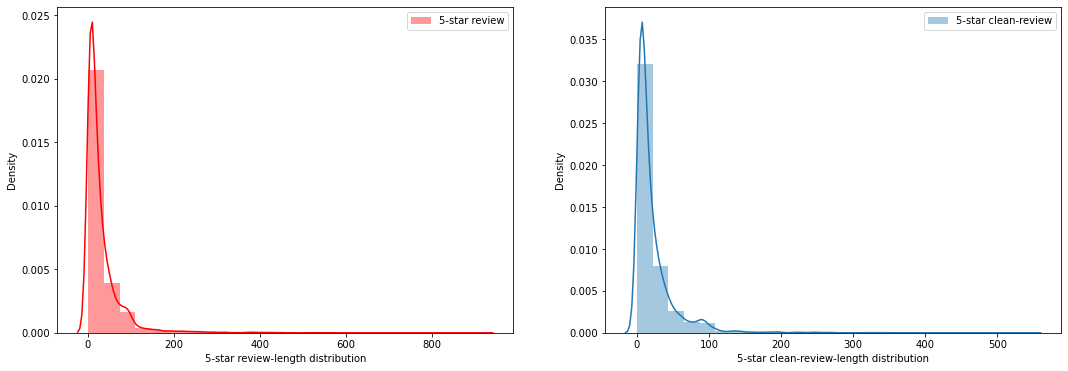

In [135]:
## Checking the distribution of reviews of the five-star rating  
f,ax= plt.subplots(1,2,figsize=(18,6))

sns.distplot(df[df['rating']==5]['review_length'], bins=25, ax=ax[0], label='5-star review',color='r')
ax[0].set_xlabel('5-star review-length distribution')
ax[0].legend()

sns.distplot(df[df['rating']==5]['clean_review_length'], bins=25, ax=ax[1], label='5-star clean-review')
ax[1].set_xlabel('5-star clean-review-length distribution')
ax[1].legend()
plt.show()

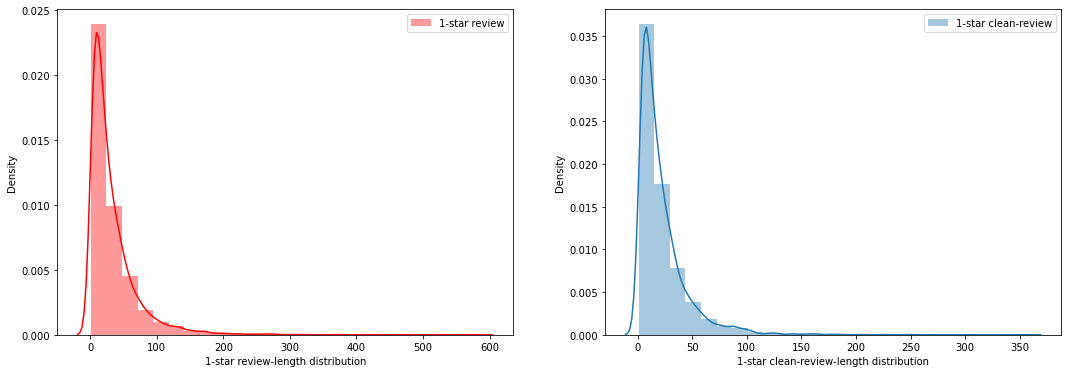

In [137]:
## DISTRIBUTION OF 1-star REVIEWS LENGTH
f,ax= plt.subplots(1,2,figsize=(18,6))

sns.distplot(df[df['rating']==1]['review_length'], bins=25, ax=ax[0], label='1-star review',color='r')
ax[0].set_xlabel('1-star review-length distribution')
ax[0].legend()

sns.distplot(df[df['rating']==1]['clean_review_length'], bins=25, ax=ax[1], label='1-star clean-review')
ax[1].set_xlabel('1-star clean-review-length distribution')
ax[1].legend()
plt.show()

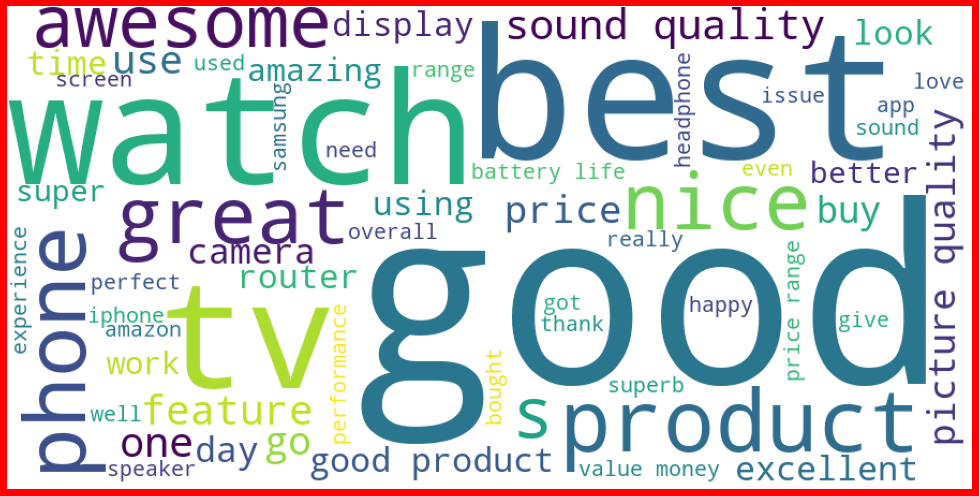

In [138]:

# GETTING SENSE OF CLOUD WORDS OF '5-star rating review'
from wordcloud import WordCloud

star_five= df['clean_text'][df['rating']==5]
rating_cloud= WordCloud(width=900,height=450, background_color='white', max_words=60).generate(' '.join(star_five))

plt.figure(figsize=(14,7), facecolor='r')
plt.imshow(rating_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

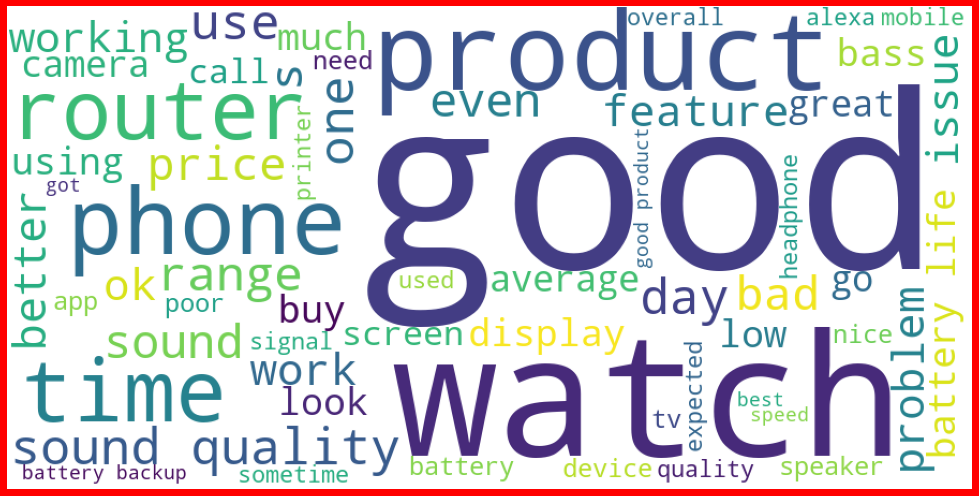

In [139]:

# GETTING SENSE OF CLOUD WORDS OF '3-star rating review'
from wordcloud import WordCloud

three_star= df['clean_text'][df['rating']==3]
rating_cloud= WordCloud(width=900,height=450, background_color='white', max_words=60).generate(' '.join(three_star))

plt.figure(figsize=(14,7), facecolor='r')
plt.imshow(rating_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

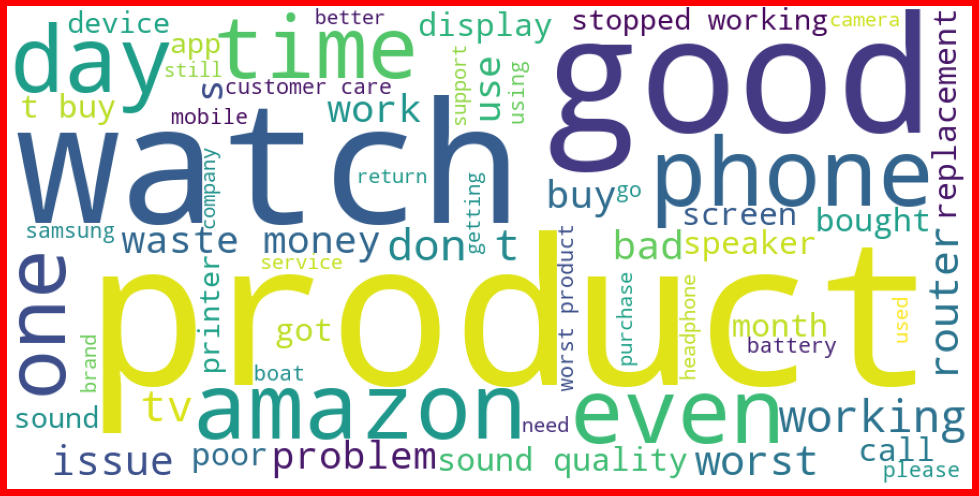

In [141]:

# GETTING SENSE OF CLOUD WORDS OF '1-star rating review'
from wordcloud import WordCloud

one_star= df['clean_text'][df['rating']==1]
rating_cloud= WordCloud(width=900,height=450, background_color='white', max_words=60).generate(' '.join(one_star))

plt.figure(figsize=(14,7), facecolor='r')
plt.imshow(rating_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()


# LET'S BUILD THE MODEL

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import *
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline

In [176]:
## SPLITTING THE DATA INTO TRAIN & TEST
x_train,x_test, y_train,y_test= train_test_split(df['clean_text'], df['rating'], test_size=0.20, random_state=42, stratify=y)

##  VECTORIZATION THE REVIEWS WITH TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf= TfidfVectorizer()
tf_fit = tf.fit(x_train)
x_train= tf_fit.transform(x_train)
x_test= tf_fit.transform(x_test)


accuracy_score 0.5222346786248132
classification_report 
               precision    recall  f1-score   support

           1       0.56      0.83      0.67      1294
           2       0.48      0.21      0.30       764
           3       0.35      0.25      0.29       865
           4       0.43      0.30      0.35      1052
           5       0.59      0.75      0.66      1377

    accuracy                           0.52      5352
   macro avg       0.48      0.47      0.45      5352
weighted avg       0.50      0.52      0.49      5352



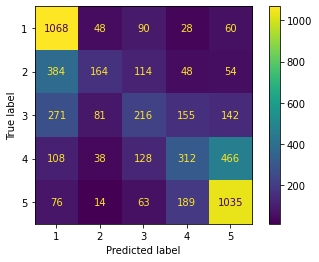

In [177]:
##                             RANDOMFOREST CLASSIFIER 
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predict= RF.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predict))
print('classification_report \n',classification_report(y_test,predict))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,predict, labels= RF.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot()
plt.show()

accuracy_score 0.5156457424615968
classification_report 
               precision    recall  f1-score   support

           1       0.54      0.82      0.65      1282
           2       0.42      0.22      0.29       757
           3       0.38      0.21      0.27       853
           4       0.43      0.30      0.35      1032
           5       0.58      0.75      0.65      1349

    accuracy                           0.52      5273
   macro avg       0.47      0.46      0.44      5273
weighted avg       0.49      0.52      0.48      5273



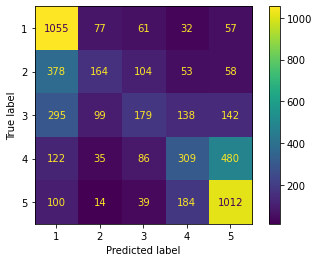

In [23]:

##                             EXTRATREES CLASSIFIER 
et= ExtraTreesClassifier()
et.fit(x_train,y_train)
predict= et.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predict))
print('classification_report \n',classification_report(y_test,predict))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,predict, labels= et.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=et.classes_)
disp.plot()
plt.show()

accuracy_score 0.5091978001137872
classification_report 
               precision    recall  f1-score   support

           1       0.53      0.87      0.66      1282
           2       0.54      0.13      0.21       757
           3       0.38      0.09      0.15       853
           4       0.39      0.26      0.31      1032
           5       0.54      0.84      0.66      1349

    accuracy                           0.51      5273
   macro avg       0.48      0.44      0.40      5273
weighted avg       0.48      0.51      0.44      5273



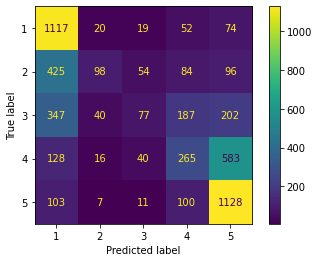

In [24]:
##                             MULTINOMIALNB
mnb= MultinomialNB()
mnb.fit(x_train,y_train)
predict= mnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predict))
print('classification_report \n',classification_report(y_test,predict))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,predict, labels= mnb.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
disp.plot()                 
plt.show() 


# model_2

In [179]:
#  we convert the multiclass rating values (5,4,3,2,1) into three different different rating (5,3,1) and then 
# check the accuracy with this model

y1 = df['rating'].replace({4:5,2:1})

x_train,x_test, y_train,y_test= train_test_split(df['clean_text'] , y1, test_size=0.20, random_state=42, )

##  VECTORIZATION THE TEXT DATA WITH TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfid= TfidfVectorizer(ngram_range=(1,2))
tfid_fit = tfid.fit(x_train)
x_train= tfid_fit.transform(x_train)
x_test= tfid_fit.transform(x_test)


accuracy_score 0.7356343637398065
classification_report 
               precision    recall  f1-score   support

           1       0.74      0.82      0.78      2008
           3       0.00      0.00      0.00       833
           5       0.73      0.92      0.81      2432

    accuracy                           0.74      5273
   macro avg       0.49      0.58      0.53      5273
weighted avg       0.62      0.74      0.67      5273



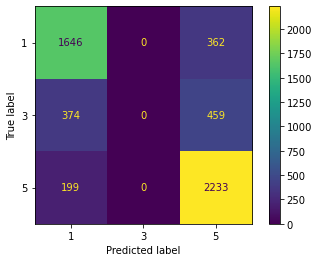

In [26]:
##         MULTINOMIAL NB

mnb= MultinomialNB()
mnb.fit(x_train,y_train)
predict= mnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predict))
print('classification_report \n',classification_report(y_test,predict))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,predict, labels= mnb.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
disp.plot()                 
plt.show() 

accuracy_score 0.7401858524559074
classification_report 
               precision    recall  f1-score   support

           1       0.71      0.85      0.77      2008
           3       0.44      0.00      0.01       833
           5       0.76      0.91      0.83      2432

    accuracy                           0.74      5273
   macro avg       0.64      0.59      0.54      5273
weighted avg       0.69      0.74      0.68      5273



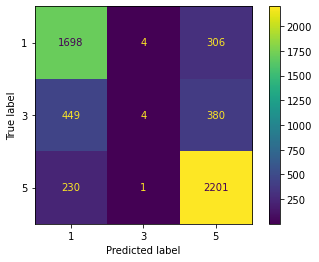

In [27]:

##                               EXTRATREES CLASSIFIER
et1= ExtraTreesClassifier(n_estimators=300,min_samples_split=4,min_samples_leaf=2,n_jobs=-1)
et1.fit(x_train,y_train)
predict= et1.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predict))
print('classification_report \n',classification_report(y_test,predict))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,predict, labels= et1.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=et1.classes_)
disp.plot()                 
plt.show() 

accuracy_score 0.745306277261521
classification_report 
               precision    recall  f1-score   support

           1       0.72      0.86      0.78      2008
           3       0.38      0.04      0.07       833
           5       0.78      0.90      0.83      2432

    accuracy                           0.75      5273
   macro avg       0.63      0.60      0.56      5273
weighted avg       0.69      0.75      0.69      5273



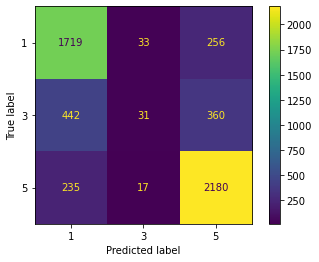

In [28]:

#                         RANDOMFOREST CLASSIFIER 
rf= RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=300)
rf.fit(x_train,y_train)
pred= rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('classification_report \n',classification_report(y_test,pred))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,pred, labels= rf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

In [181]:
x_train,x_test, y_train,y_test= train_test_split(df['clean_text'] , y1, test_size=0.20, random_state=42, )

pipe = Pipeline([('tfidf', TfidfVectorizer()),('RFC', RandomForestClassifier())])
pipe.fit(x_train, y_train)

r_pred = pipe.predict(x_test)
print('accuracy_score=', accuracy_score(y_test, r_pred))
#print('precision_score=', precision_score(y_test, r_pred))
#print('recall_score=', recall_score(y_test, r_pred))
#print('f1_score=', f1_score(y_test, r_pred))
print('confusion matrix \n', confusion_matrix(y_test, r_pred))
print('classification report \n', classification_report(y_test, r_pred))

accuracy_score= 0.7329970104633782
confusion matrix 
 [[1734   45  271]
 [ 444   37  387]
 [ 257   25 2152]]
classification report 
               precision    recall  f1-score   support

           1       0.71      0.85      0.77      2050
           3       0.35      0.04      0.08       868
           5       0.77      0.88      0.82      2434

    accuracy                           0.73      5352
   macro avg       0.61      0.59      0.56      5352
weighted avg       0.68      0.73      0.68      5352



In [ ]:
# some accuracy got improved after decreased the rating values



# model_3
 multiclass target value (5,4,3,2,1) changed into (5, 1-star) for checking that whether the accuracy improves or not

In [35]:
##  VECTORIZATION THE TEXT DATA WITH TF-IDF

y2 = data['rating'].replace({4:5,2:1,3:1})

x_train,x_test, y_train,y_test= train_test_split(data['review'],y2, test_size=0.20, random_state=9, )

##  VECTORIZATION THE TEXT DATA WITH TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfid= TfidfVectorizer(ngram_range =(1,2))
tfid_fit = tfid.fit(x_train)
x_train= tfid_fit.transform(x_train)
x_test= tfid_fit.transform(x_test)

accuracy_score 0.8420254124786649
classification_report 
               precision    recall  f1-score   support

           1       0.81      0.92      0.86      2841
           5       0.89      0.75      0.81      2432

    accuracy                           0.84      5273
   macro avg       0.85      0.84      0.84      5273
weighted avg       0.85      0.84      0.84      5273



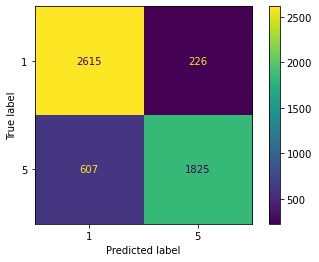

In [36]:

##  MULTINOMIAL NB 

mnb= MultinomialNB()
mnb.fit(x_train,y_train)
predict= mnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predict))
print('classification_report \n',classification_report(y_test,predict))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,predict, labels= mnb.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
disp.plot()                 
plt.show() 

accuracy_score 0.8520766167267211
classification_report 
               precision    recall  f1-score   support

           1       0.85      0.88      0.87      2841
           5       0.86      0.82      0.84      2432

    accuracy                           0.85      5273
   macro avg       0.85      0.85      0.85      5273
weighted avg       0.85      0.85      0.85      5273



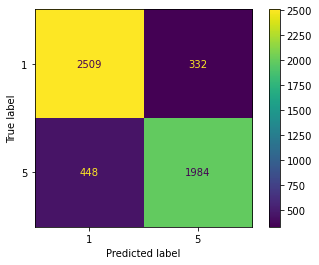

In [37]:
# RANDOM FOREST 
rf= RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=300)
rf.fit(x_train,y_train)
pred= rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('classification_report \n',classification_report(y_test,pred))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,pred, labels= rf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

accuracy_score 0.8469561919211075
classification_report 
               precision    recall  f1-score   support

           1       0.83      0.90      0.86      2841
           5       0.87      0.79      0.83      2432

    accuracy                           0.85      5273
   macro avg       0.85      0.84      0.84      5273
weighted avg       0.85      0.85      0.85      5273



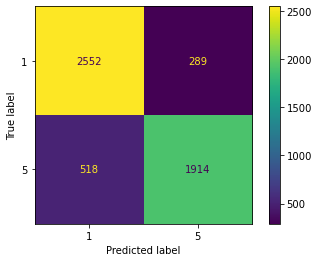

In [38]:

##                               EXTRATREES CLASSIFIER
et1= ExtraTreesClassifier(n_estimators=300,min_samples_split=4,min_samples_leaf=2,n_jobs=-1)
et1.fit(x_train,y_train)
predict= et1.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predict))
print('classification_report \n',classification_report(y_test,predict))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,predict, labels= et1.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=et1.classes_)
disp.plot()                 
plt.show() 

In [ ]:
. The target colum in this project is a multiclass and when I made the model on it, the accuracy was around 70% then i chhanged
the values of the target to 3 types, then some accuracy increased. After that I changed the target to binary class as 
the positive and negative rating, Then accuracy came at 84 percent


On this data it is difficult to predict multiclass target with good accuracy beacause some customer reviews in this data are 
almost sane but their ratings are different, That is why after converting this multiclass Target attribute to binary class,
the accuracy is getting better